In [1]:
#Import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet
import warnings
warnings.filterwarnings("ignore")
sns.set(style="darkgrid")
%matplotlib inline

In [2]:
#Load dataset
df = pd.read_csv(r'weatherHistory.csv')

In [3]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [4]:
df.tail()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20,16.1000,1015.95,Partly cloudy starting in the morning.
96452,2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39,15.5204,1016.16,Partly cloudy starting in the morning.


In [5]:
df.shape

(96453, 11)

In [6]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  int64  
 8   Visibility (km)           96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
 10  Daily Summary             96453 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 8.1+ MB


In [8]:
#Check null values
df.isna().any()

Formatted Date              False
Summary                     False
Precip Type                  True
Temperature (C)             False
Apparent Temperature (C)    False
Humidity                    False
Wind Speed (km/h)           False
Wind Bearing (degrees)      False
Visibility (km)             False
Pressure (millibars)        False
Daily Summary               False
dtype: bool

In [9]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [10]:
#Convert date column to datetime
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True, errors='coerce')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            96453 non-null  datetime64[ns, UTC]
 1   Summary                   96453 non-null  object             
 2   Precip Type               95936 non-null  object             
 3   Temperature (C)           96453 non-null  float64            
 4   Apparent Temperature (C)  96453 non-null  float64            
 5   Humidity                  96453 non-null  float64            
 6   Wind Speed (km/h)         96453 non-null  float64            
 7   Wind Bearing (degrees)    96453 non-null  int64              
 8   Visibility (km)           96453 non-null  float64            
 9   Pressure (millibars)      96453 non-null  float64            
 10  Daily Summary             96453 non-null  object             
dtypes: datetime64[n

In [12]:
#Resample according to month and year
monthly_data = df.set_index('Formatted Date').resample('M').mean()[1:]
yearly_data = df.set_index('Formatted Date').resample('Y').mean()[1:]
monthly_data.reset_index(inplace=True)
yearly_data.reset_index(inplace=True)

In [13]:
monthly_data.head()

,Formatted Date,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,2006-01-31 00:00:00+00:00,-1.677942,-4.173708,0.834610,8.894211,161.018817,7.894064,1021.204960
1,2006-02-28 00:00:00+00:00,-0.065394,-2.990716,0.843467,10.957008,197.886905,7.418794,995.183914
2,2006-03-31 00:00:00+00:00,4.559274,1.969780,0.778737,14.421488,195.059140,9.602590,976.436263
3,2006-04-30 00:00:00+00:00,12.635031,12.098827,0.728625,10.930670,191.877778,10.626760,1013.493694
4,2006-05-31 00:00:00+00:00,15.650732,15.539479,0.721801,10.174161,209.310484,11.748066,1016.629785


In [14]:
yearly_data

,Formatted Date,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,2006-12-31 00:00:00+00:00,11.215225,10.158189,0.767349,10.189128,189.339726,9.757280,992.545486
1,2007-12-31 00:00:00+00:00,12.134677,11.062986,0.689647,10.824162,194.106393,10.408192,1001.639412
2,2008-12-31 00:00:00+00:00,12.161819,11.053128,0.701239,11.304172,193.860997,10.266882,1007.734488
3,2009-12-31 00:00:00+00:00,12.269682,11.070866,0.707247,11.507326,180.477740,10.002187,1002.605055
4,2010-12-31 00:00:00+00:00,11.200176,10.097002,0.796861,11.014343,192.078780,9.140282,1004.815439
5,2011-12-31 00:00:00+00:00,11.524934,10.584490,0.736008,9.898596,189.334475,9.508237,1014.183506
6,2012-12-31 00:00:00+00:00,11.986824,10.753117,0.689513,11.264745,187.746926,10.362670,999.341404
7,2013-12-31 00:00:00+00:00,11.941017,10.825509,0.754197,10.970036,187.862557,10.892672,1004.951297
8,2014-12-31 00:00:00+00:00,12.528228,11.627649,0.748571,10.501276,178.241064,11.320400,987.277688
9,2015-12-31 00:00:00+00:00,12.312088,11.341286,0.732354,10.735590,184.084589,10.914116,1005.297210


In [15]:
df1 = df[['Formatted Date','Apparent Temperature (C)']]

In [16]:
#Maximum and minimum temperature per year
max_temp = df1.set_index('Formatted Date').resample('Y').max()[1:]
min_temp = df1.set_index('Formatted Date').resample('Y').min()[1:]
max_temp.reset_index(inplace=True)
min_temp.reset_index(inplace=True)

In [17]:
max_temp.rename(columns = {'Apparent Temperature (C)':'Max Apparent Temperature (C)'}, inplace = True)
min_temp.rename(columns = {'Apparent Temperature (C)':'Min Apparent Temperature (C)'}, inplace = True)

In [18]:
min_max_temp = pd.merge(max_temp, min_temp, how ='inner', on ='Formatted Date')
min_max_temp['Formatted Date'] = min_max_temp['Formatted Date'].dt.year

In [19]:
min_max_temp

,Formatted Date,Max Apparent Temperature (C),Min Apparent Temperature (C)
0,2006,36.400000,-22.094444
1,2007,38.377778,-12.422222
2,2008,36.855556,-17.261111
3,2009,36.922222,-24.233333
4,2010,38.116667,-21.411111
5,2011,37.716667,-12.761111
6,2012,37.883333,-27.716667
7,2013,39.344444,-13.888889
8,2014,35.094444,-19.472222
9,2015,37.783333,-14.644444


In [20]:
#Maximum and minimum temperature per year
max_hum = df1.set_index('Formatted Date').resample('Y').max()[1:]
min_hum = df1.set_index('Formatted Date').resample('Y').min()[1:]
max_hum.reset_index(inplace=True)
min_hum.reset_index(inplace=True)

In [21]:
max_temp.rename(columns = {'Apparent Temperature (C)':'Max Apparent Temperature (C)'}, inplace = True)
min_temp.rename(columns = {'Apparent Temperature (C)':'Min Apparent Temperature (C)'}, inplace = True)

In [22]:
min_max_temp = pd.merge(max_temp, min_temp, how ='inner', on ='Formatted Date')
min_max_temp['Formatted Date'] = min_max_temp['Formatted Date'].dt.year

In [23]:
min_max_temp

,Formatted Date,Max Apparent Temperature (C),Min Apparent Temperature (C)
0,2006,36.400000,-22.094444
1,2007,38.377778,-12.422222
2,2008,36.855556,-17.261111
3,2009,36.922222,-24.233333
4,2010,38.116667,-21.411111
5,2011,37.716667,-12.761111
6,2012,37.883333,-27.716667
7,2013,39.344444,-13.888889
8,2014,35.094444,-19.472222
9,2015,37.783333,-14.644444


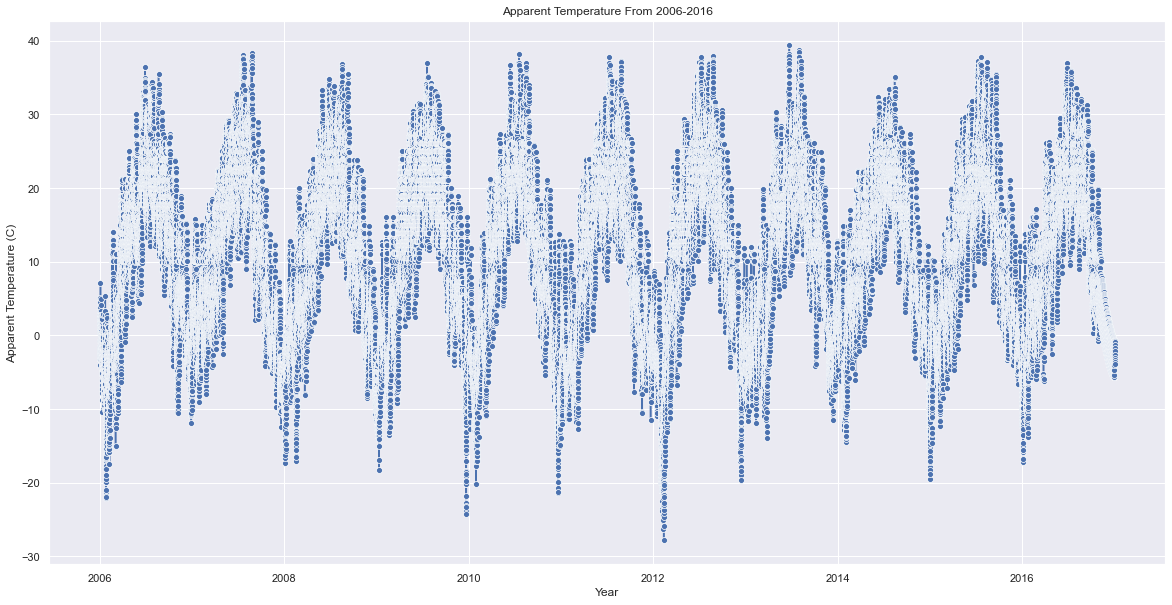

In [24]:
#Apparent Temperature From 2006-2016
plt.figure(figsize=(20,10))
plt.title("Apparent Temperature From 2006-2016")
sns.lineplot(df['Formatted Date'],df['Apparent Temperature (C)'],marker='o')
plt.xlabel("Year");

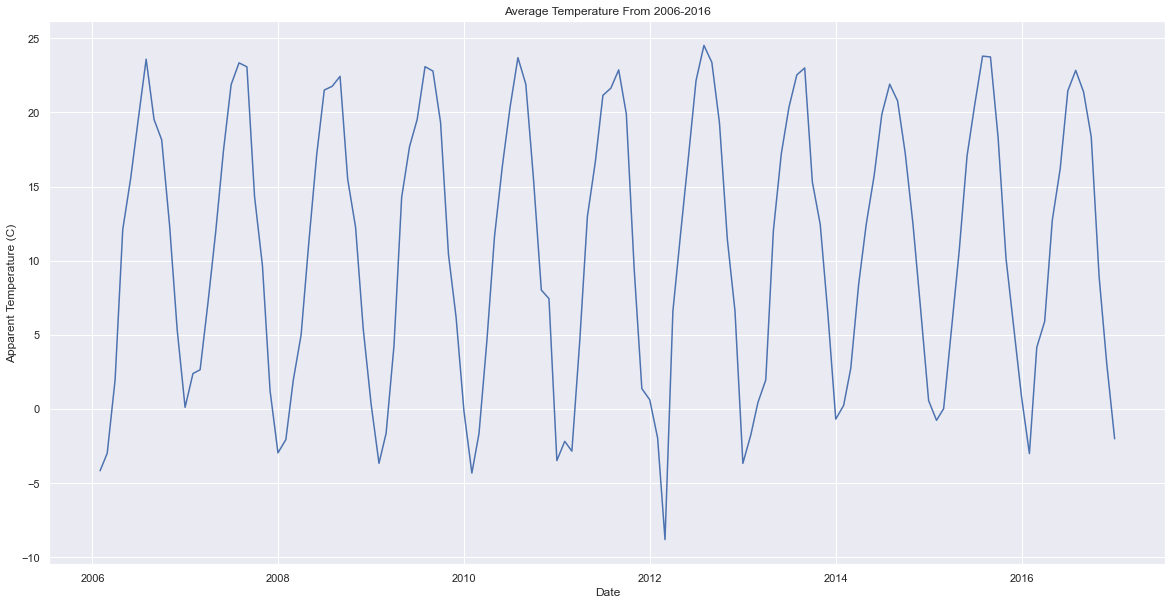

In [25]:
#Visualizing data

#Average Temperature From 2006-2016
plt.figure(figsize=(20,10))
plt.title('Average Temperature From 2006-2016');
sns.lineplot(monthly_data['Formatted Date'],monthly_data['Apparent Temperature (C)'])
plt.xlabel("Date");

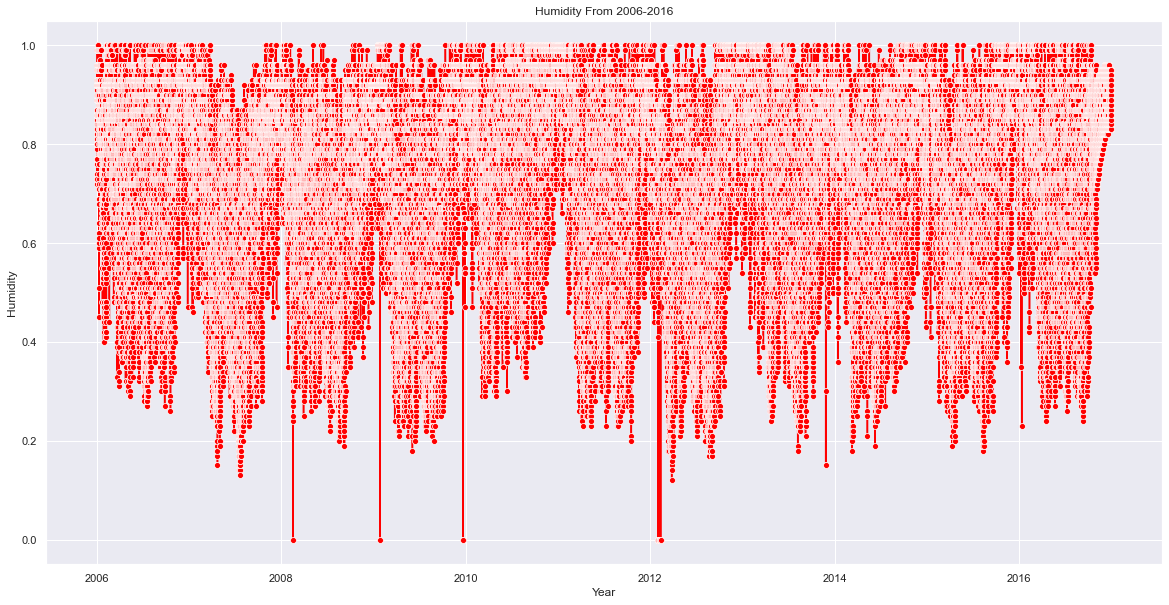

In [26]:
#Humidity From 2006-2016
plt.figure(figsize=(20,10))
plt.title("Humidity From 2006-2016")
sns.lineplot(df['Formatted Date'],df['Humidity'], color='red', marker='o')
plt.xlabel("Year");

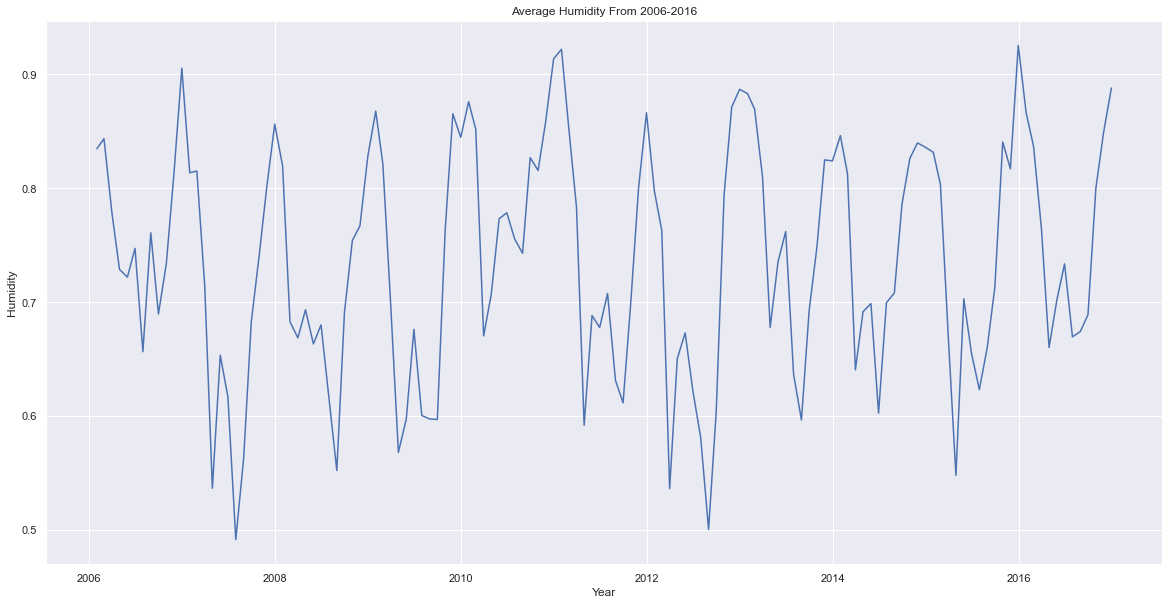

In [27]:
#Average Humidity From 2006-2016
plt.figure(figsize=(20,10))
plt.title("Average Humidity From 2006-2016")
sns.lineplot(monthly_data['Formatted Date'],monthly_data['Humidity'])
plt.xlabel('Year');

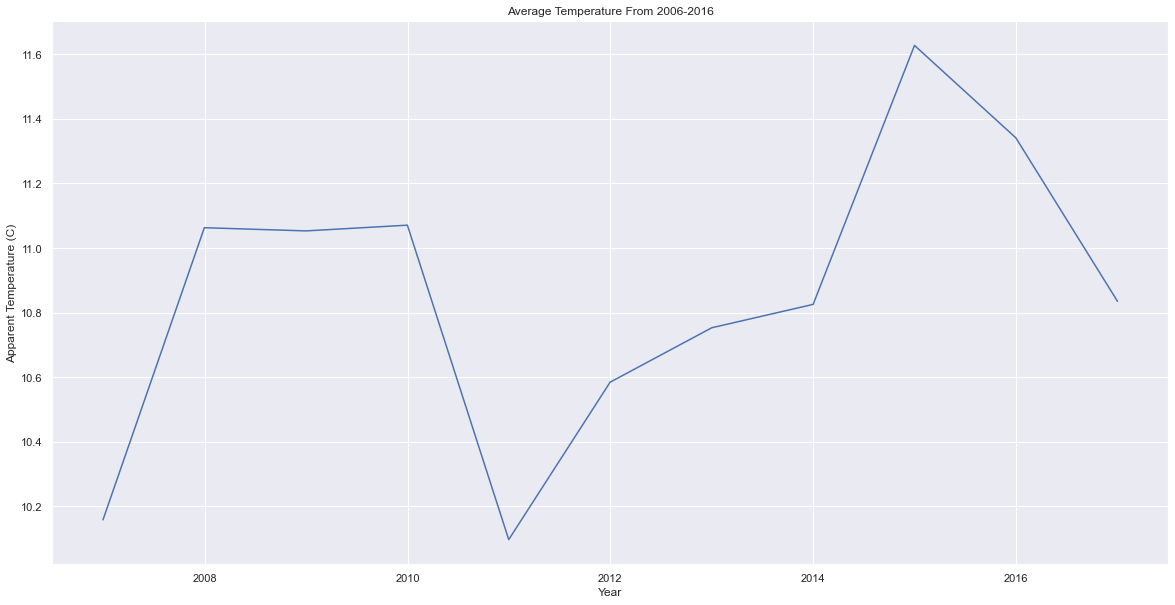

In [28]:
#Average Temperature From 2006-2016
plt.figure(figsize=(20,10))
plt.title('Average Temperature From 2006-2016');
sns.lineplot(yearly_data['Formatted Date'],yearly_data['Apparent Temperature (C)'])
plt.xlabel("Year");

In [29]:
avg_monthly_temp = pd.DataFrame(df.groupby([df["Formatted Date"].dt.month])["Apparent Temperature (C)"].mean())
avg_monthly_humidity = pd.DataFrame(df.groupby([df["Formatted Date"].dt.month])["Humidity"].mean())
avg_monthly_temp.reset_index(inplace=True)
avg_monthly_humidity.reset_index(inplace=True)

In [30]:
avg_monthly_temp

,Formatted Date,Apparent Temperature (C)
0,1,-1.938761
1,2,-0.555908
2,3,5.082583
3,4,12.158287
4,5,16.733265
5,6,20.755415
6,7,22.977605
7,8,22.264600
8,9,17.389856
9,10,10.684673


In [31]:
avg_monthly_humidity

,Formatted Date,Humidity
0,1,0.850698
1,2,0.813407
2,3,0.702849
3,4,0.641051
4,5,0.691650
5,6,0.686418
6,7,0.639593
7,8,0.635300
8,9,0.689163
9,10,0.774443


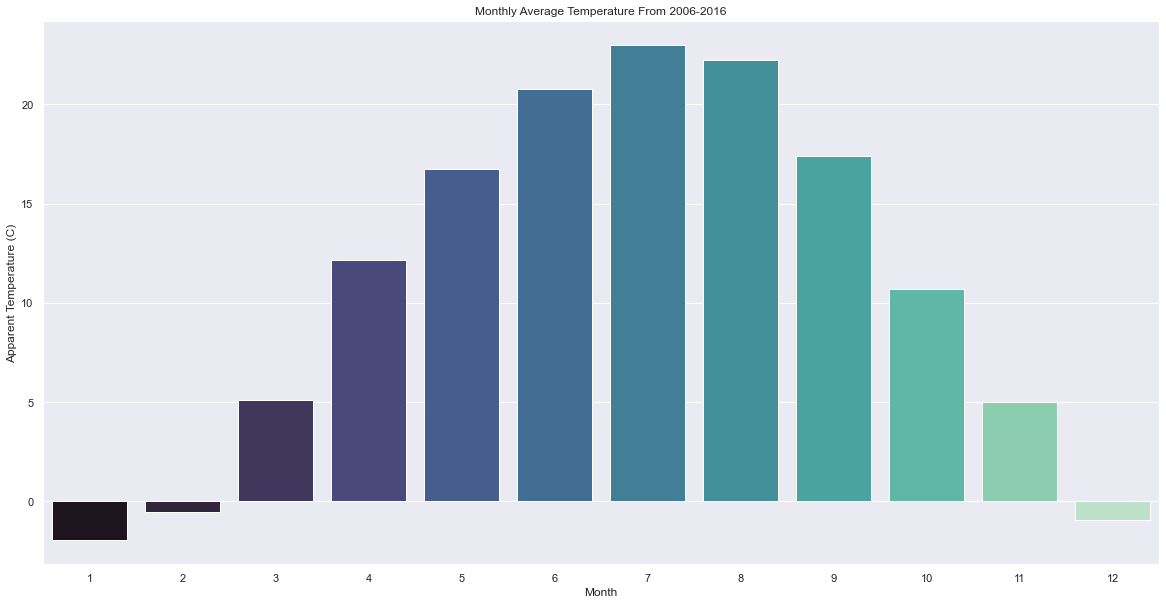

In [32]:
#Monthly Average Temperature From 2006-2016
plt.figure(figsize=(20,10))
plt.title("Monthly Average Temperature From 2006-2016")
sns.barplot(avg_monthly_temp['Formatted Date'],avg_monthly_temp['Apparent Temperature (C)'], palette="mako")
plt.xlabel("Month");

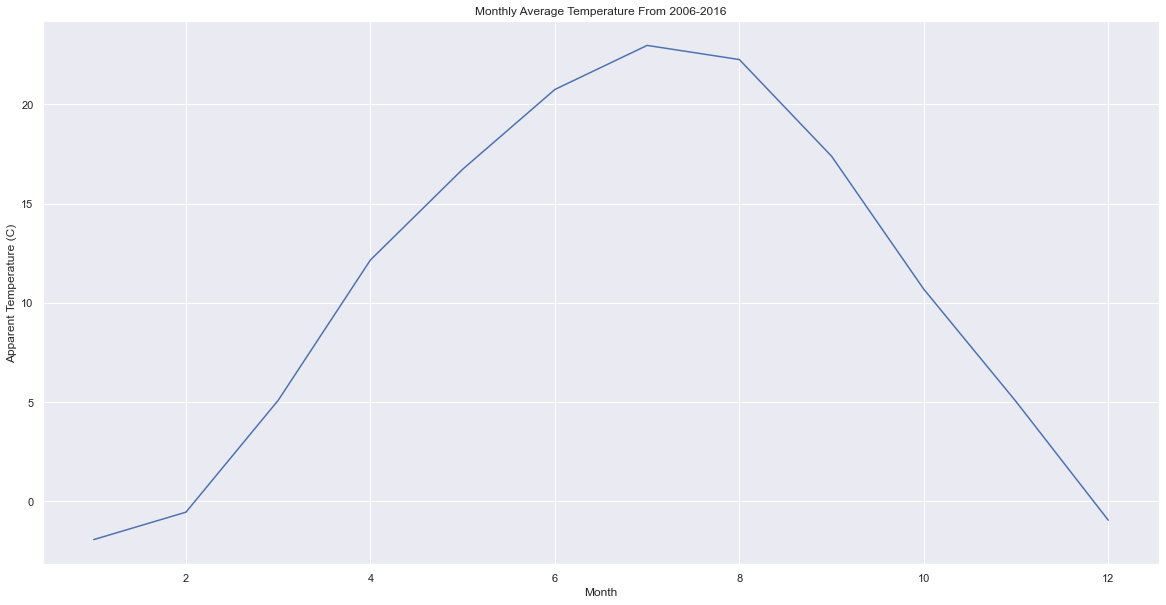

In [33]:
#Monthly Average Temperature From 2006-2016
plt.figure(figsize=(20,10))
plt.title("Monthly Average Temperature From 2006-2016")
sns.lineplot(avg_monthly_temp['Formatted Date'],avg_monthly_temp['Apparent Temperature (C)'])
plt.xlabel("Month");

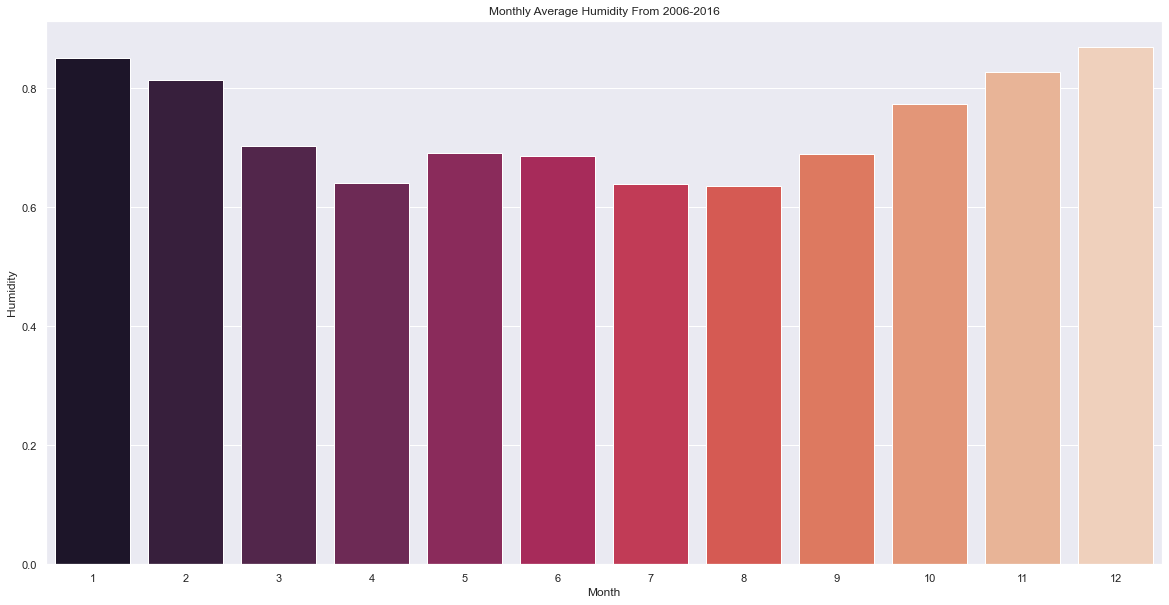

In [34]:
#Monthly Average Humidity From 2006-2016
plt.figure(figsize=(20,10))
plt.title("Monthly Average Humidity From 2006-2016")
sns.barplot(avg_monthly_humidity['Formatted Date'],avg_monthly_humidity['Humidity'], palette="rocket")
plt.xlabel("Month");

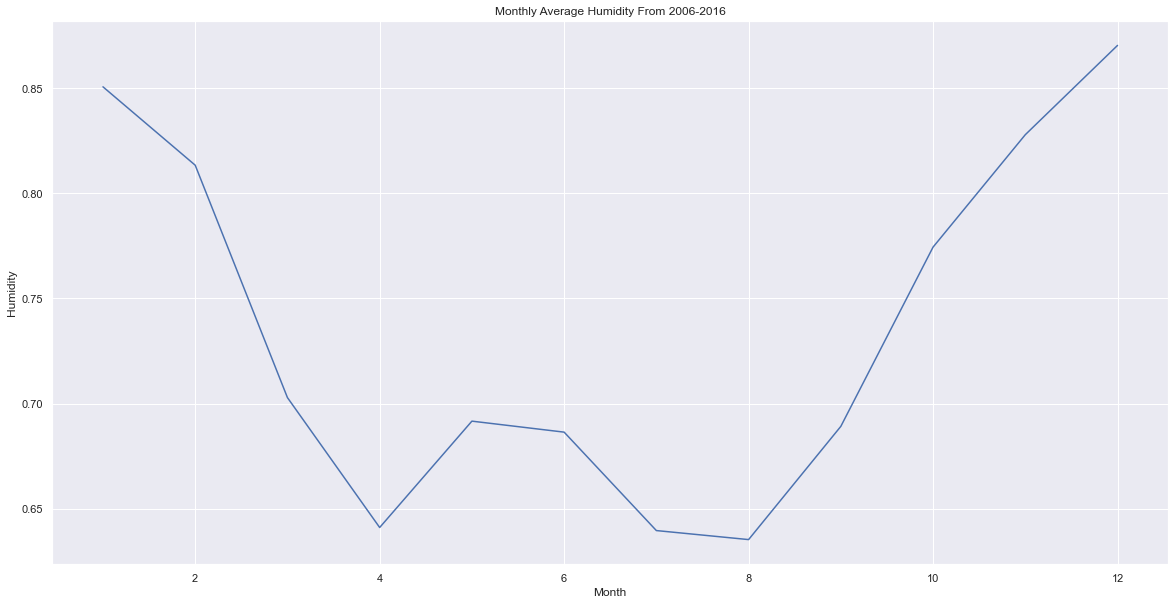

In [35]:
#Monthly Average Humidity From 2006-2016
plt.figure(figsize=(20,10))
plt.title("Monthly Average Humidity From 2006-2016")
sns.lineplot(avg_monthly_humidity['Formatted Date'],avg_monthly_humidity['Humidity'])
plt.xlabel("Month");

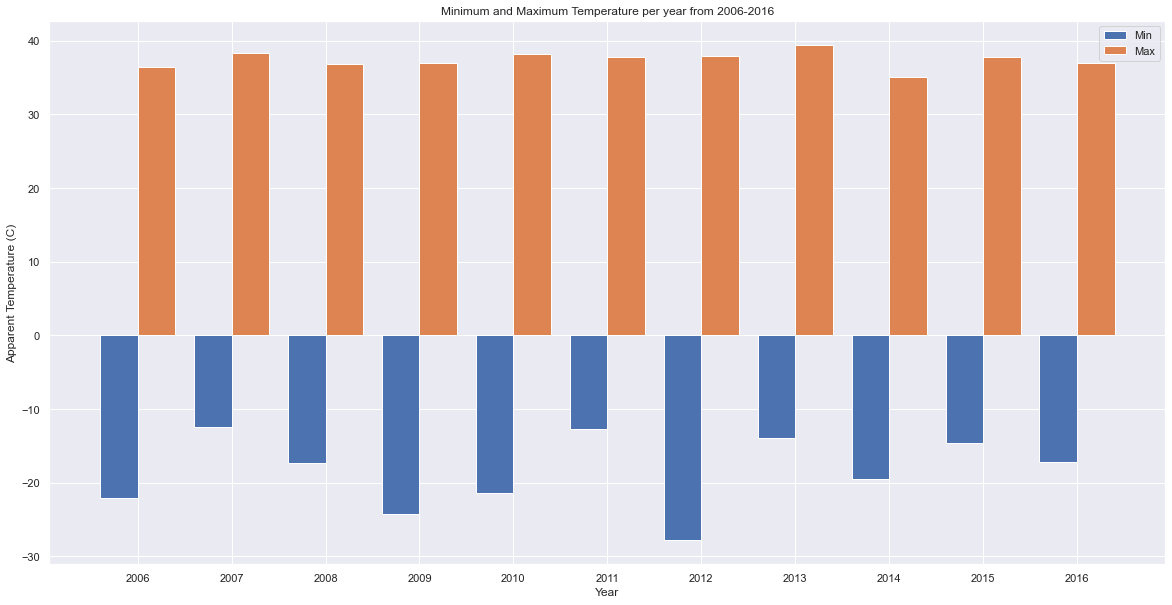

In [36]:
#Minimum and Maximum Temperature per year from 2006-2016
X_axis = np.arange(len(min_max_temp['Formatted Date']))

plt.figure(figsize=(20,10))

plt.bar(X_axis - 0.2, min_max_temp['Min Apparent Temperature (C)'], 0.4, label = 'Min')
plt.bar(X_axis + 0.2, min_max_temp['Max Apparent Temperature (C)'], 0.4, label = 'Max')

plt.xticks(X_axis, min_max_temp['Formatted Date'])
plt.xlabel("Year")
plt.ylabel("Apparent Temperature (C)")
plt.title("Minimum and Maximum Temperature per year from 2006-2016")
plt.legend()
plt.show()

<AxesSubplot:xlabel='Summary', ylabel='Temperature (C)'>

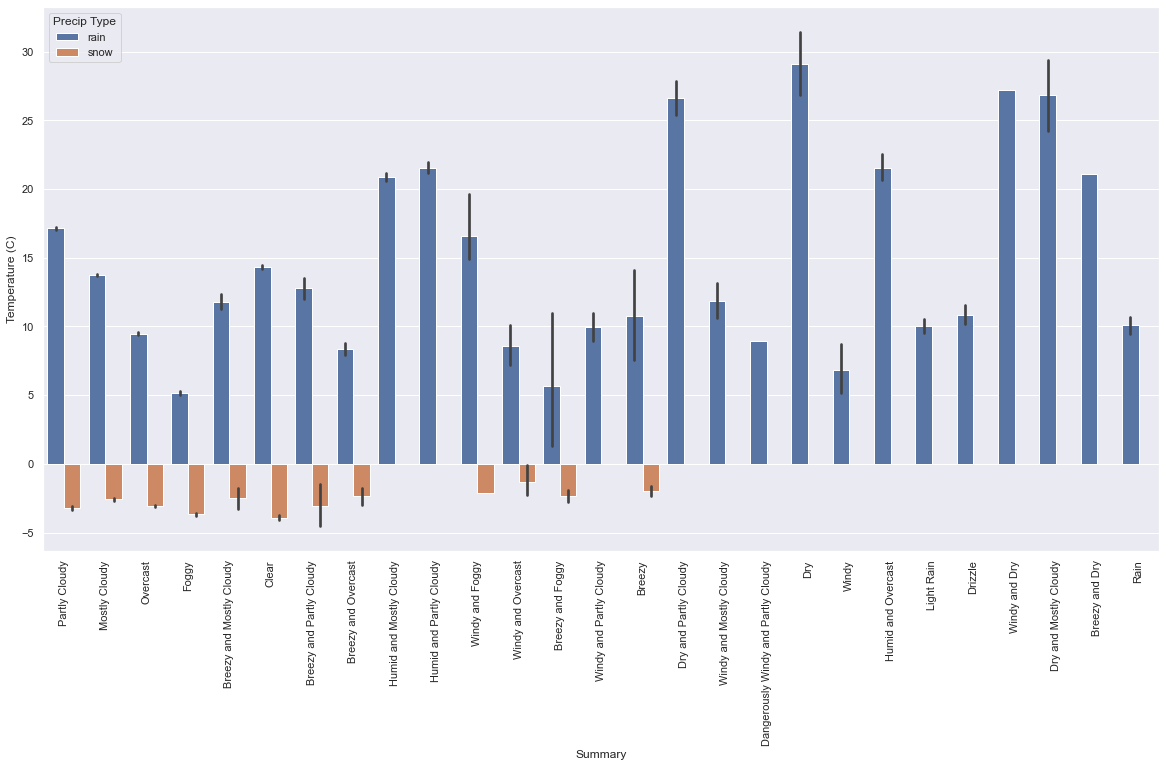

In [37]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.barplot(data=df, x="Summary", y="Temperature (C)",hue="Precip Type")

In [38]:
month = {1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}
for i in range(1,13):
    month[i] = monthly_data[pd.to_datetime(monthly_data['Formatted Date']).dt.month == i]

m = {1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}

def plot_temp():
    for t in range(1,13):
        plt.figure(figsize=(12,6))
        plt.title("Average Temperature in "+ m[t] +" From 2006-2016")
        sns.barplot(month[t]['Formatted Date'].dt.year,month[t]['Apparent Temperature (C)'],palette='mako')
        plt.xlabel('Year');

def plot_humidity():
    for h in range(1,13):
        plt.figure(figsize=(12,6))
        plt.title("Average Humidity in "+ m[h] +" From 2006-2016")
        sns.barplot(month[h]['Formatted Date'].dt.year,month[h]['Humidity'],palette='rocket')
        plt.xlabel('Year');

def plot_temp_humidity():
    for th in range(1,13):
        plt.figure(figsize=(12,6))
        plt.title("Average Temperature and Humidity in "+ m[th] +" From 2006-2016")
        sns.lineplot(month[th]['Formatted Date'].dt.year,month[th]['Apparent Temperature (C)'], label='Apparent Temperature')
        sns.lineplot(month[th]['Formatted Date'].dt.year,month[th]['Humidity'], label='Humidity')
        plt.xlabel('Year');

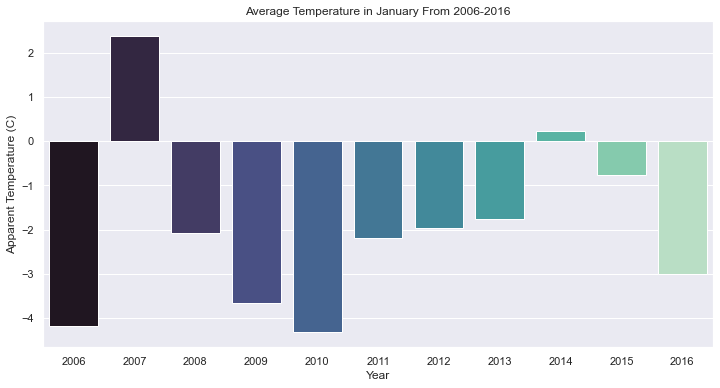

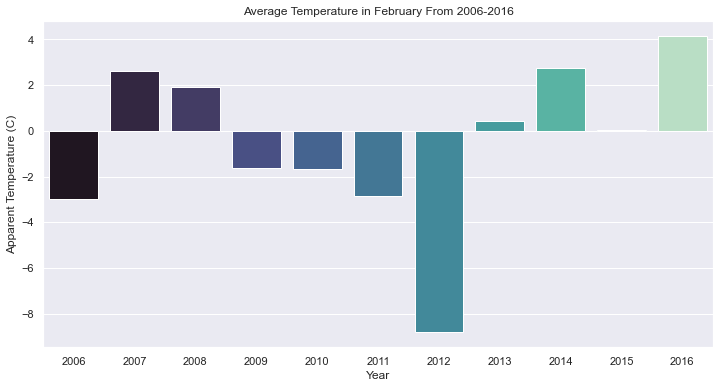

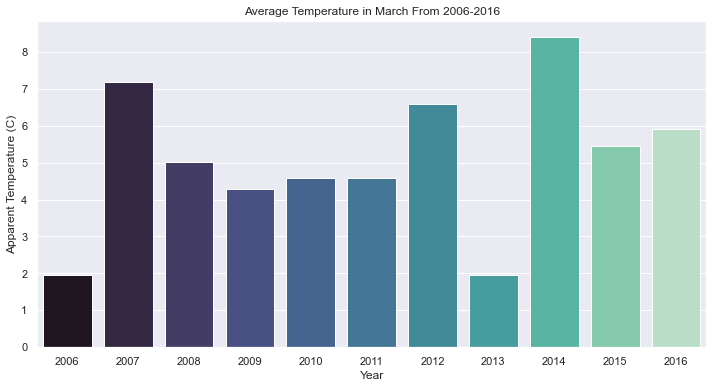

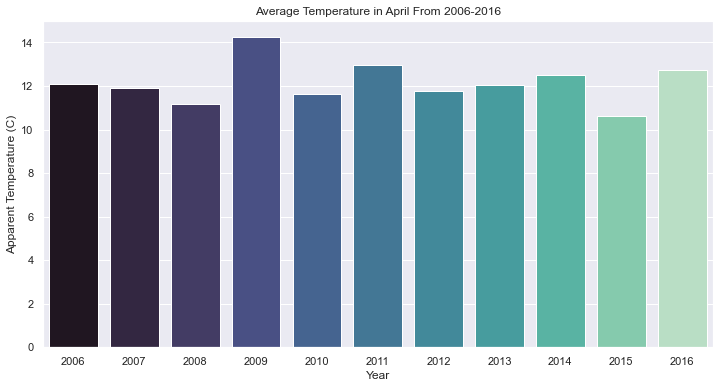

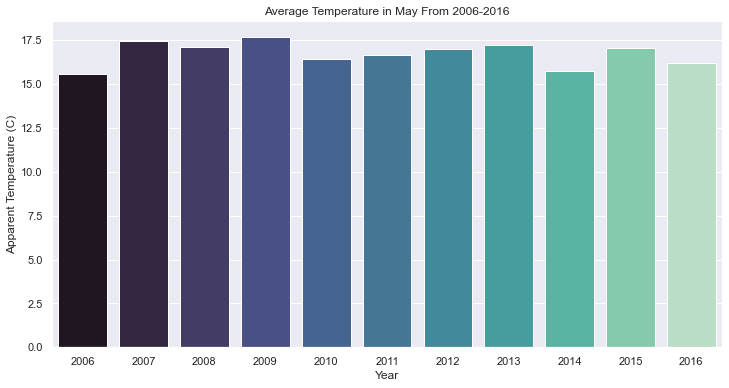

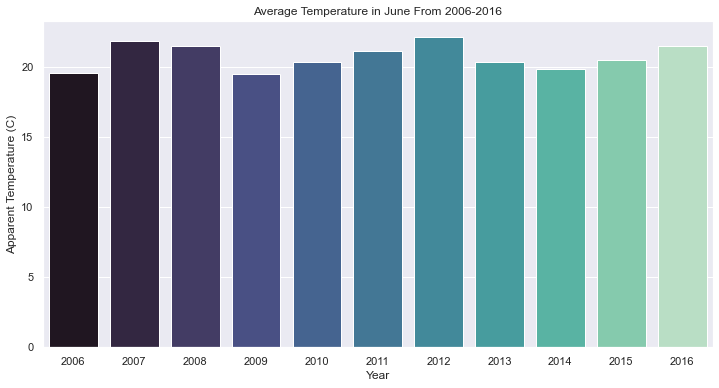

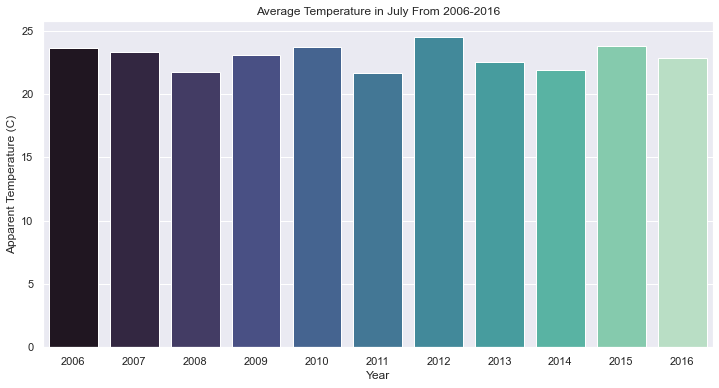

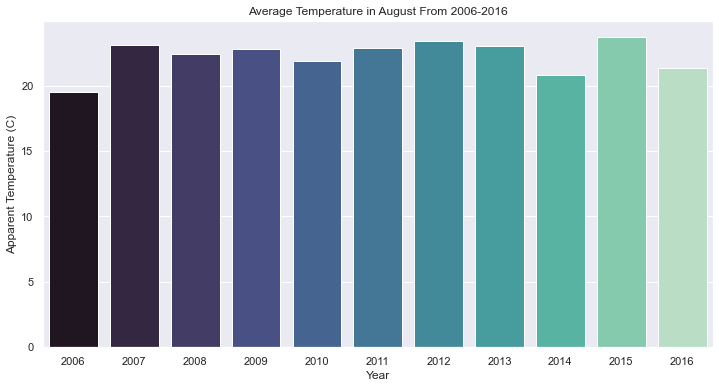

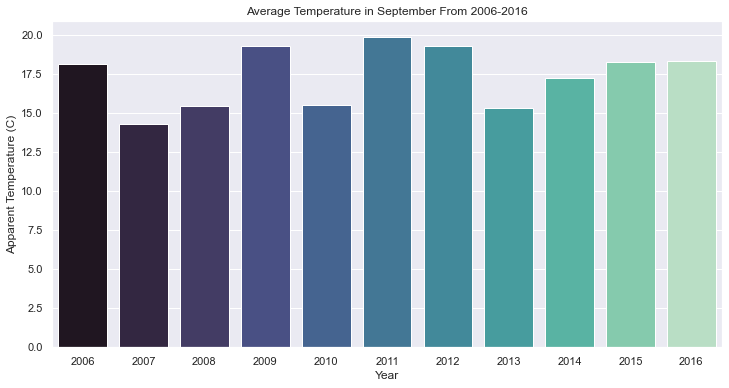

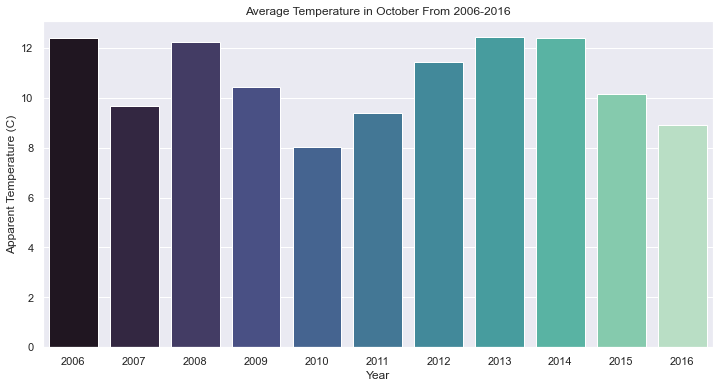

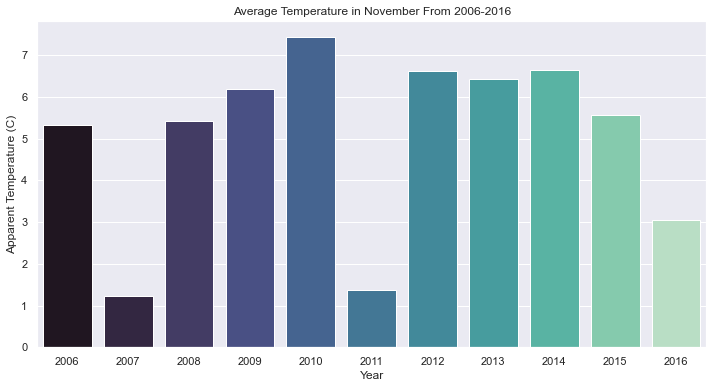

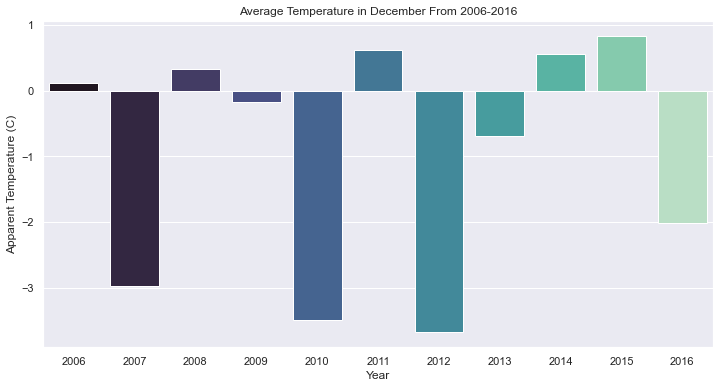

In [39]:
plot_temp()

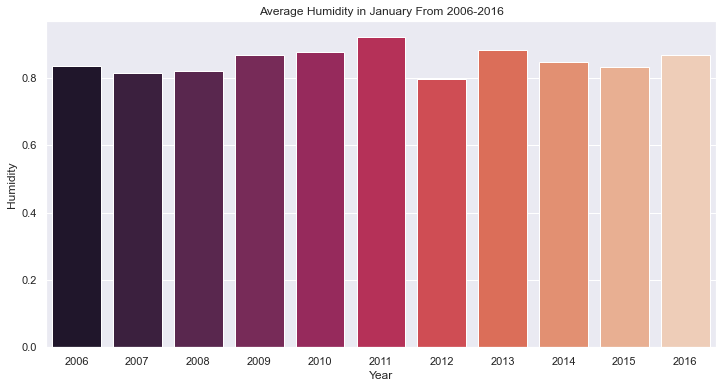

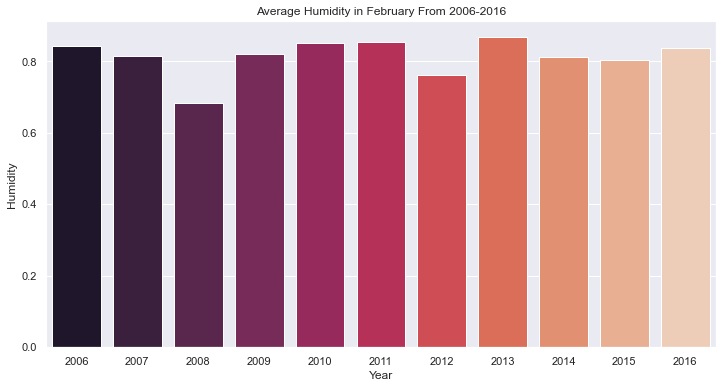

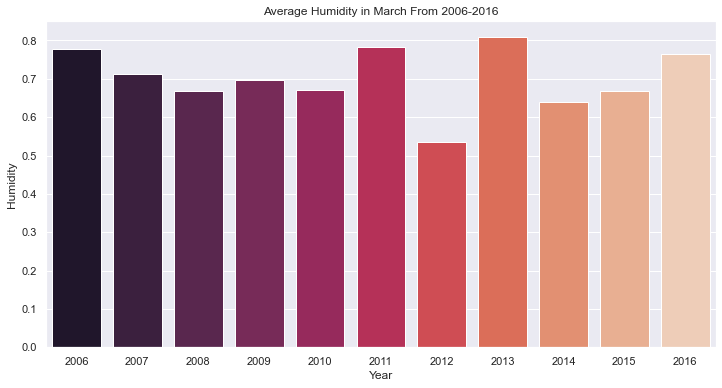

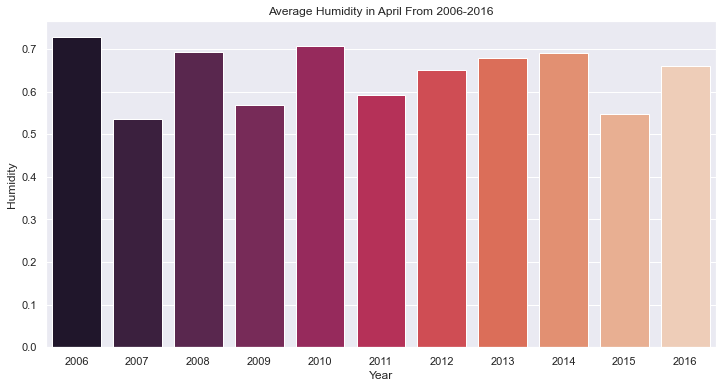

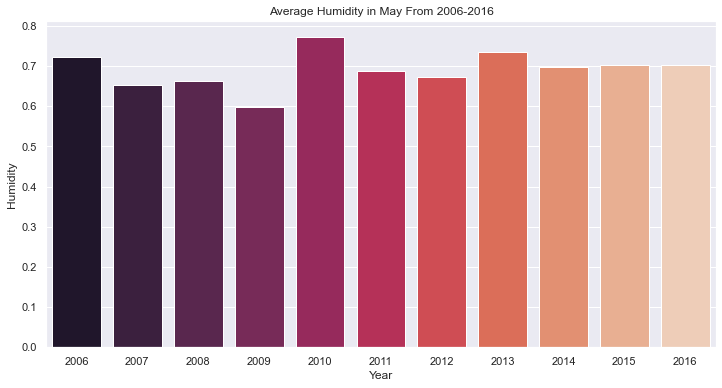

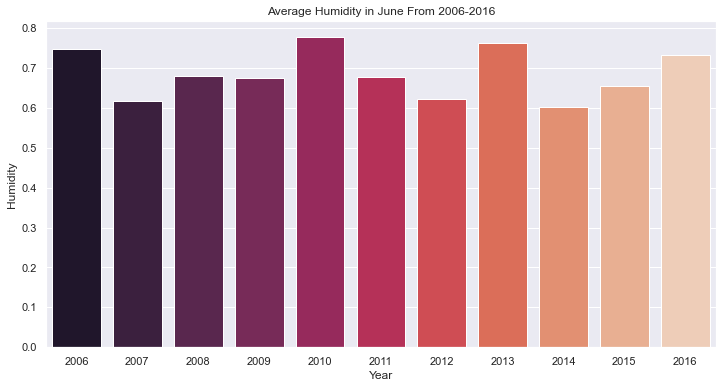

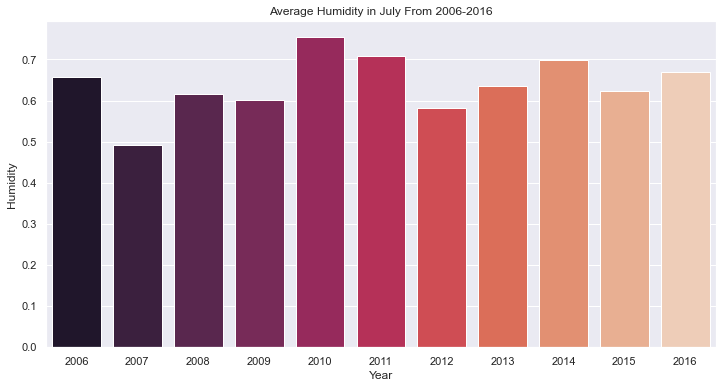

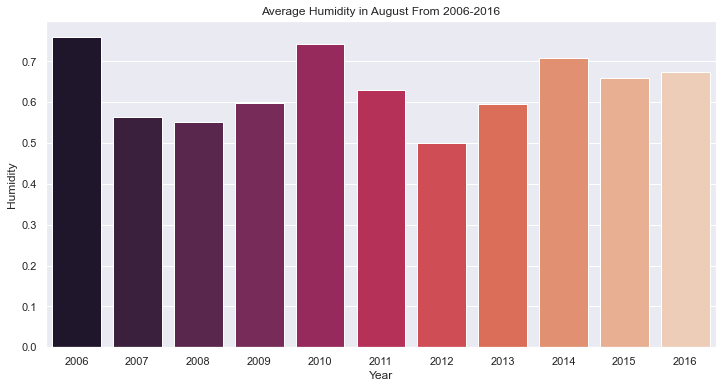

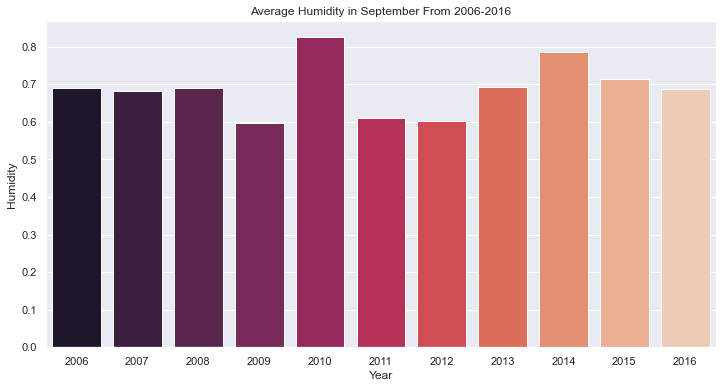

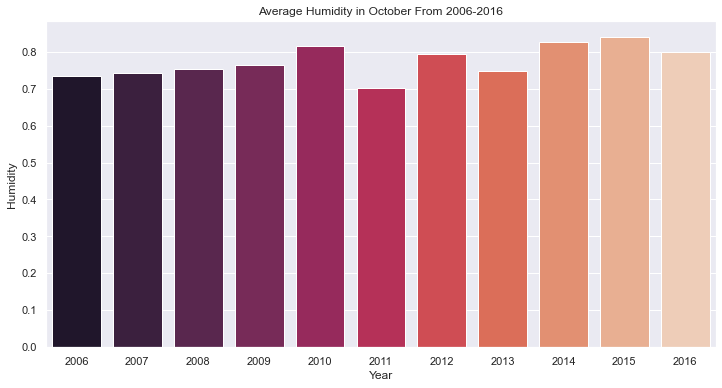

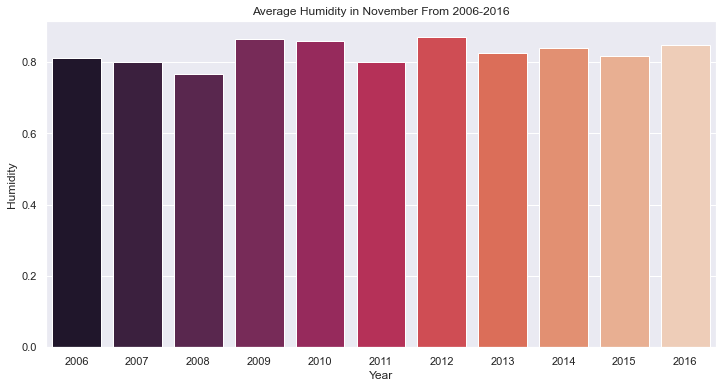

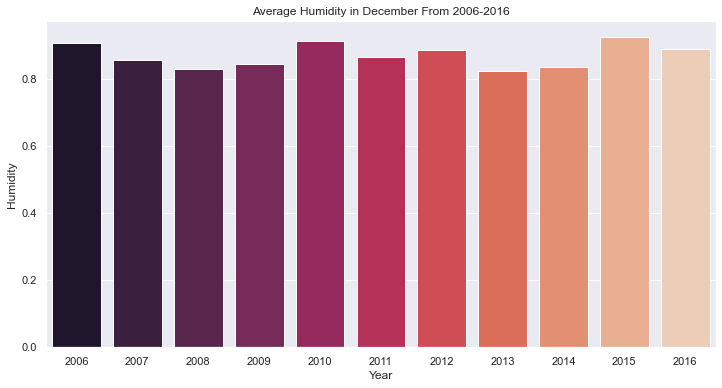

In [40]:
plot_humidity()

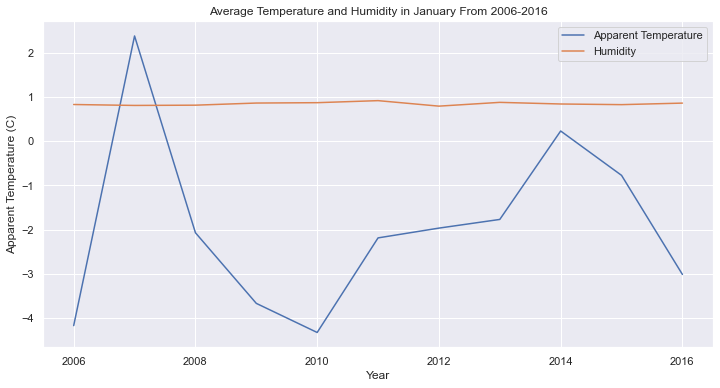

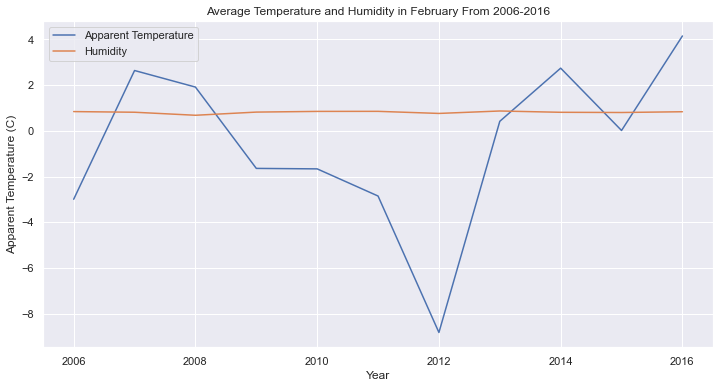

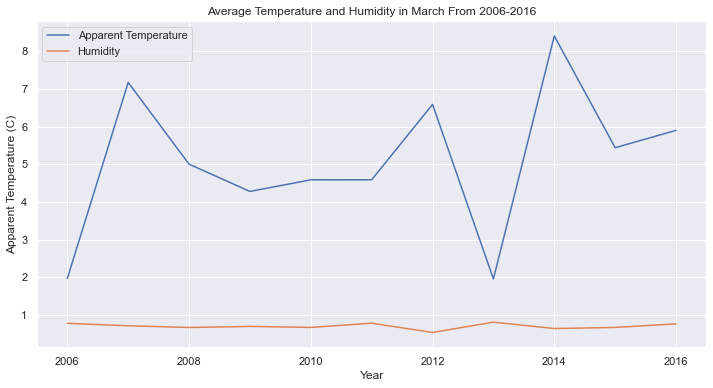

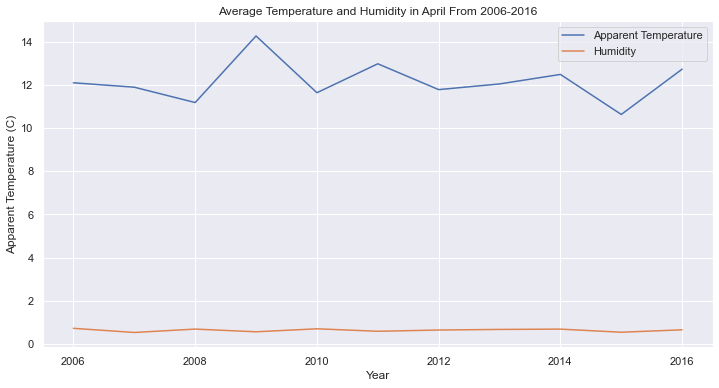

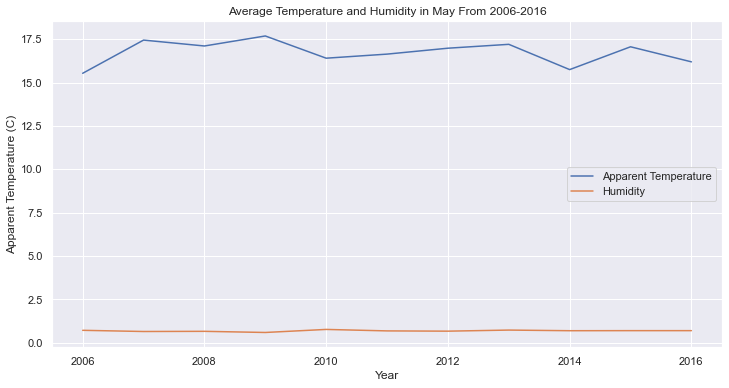

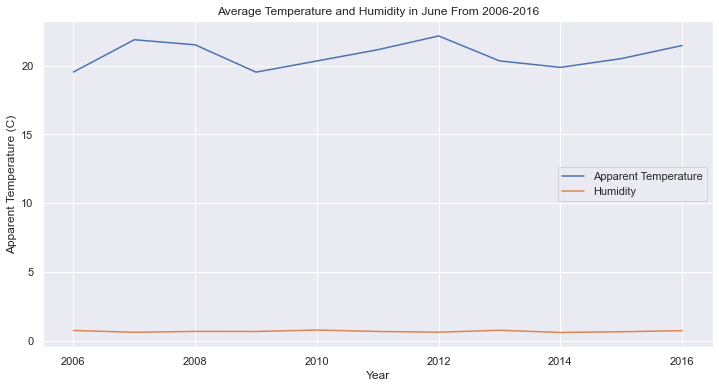

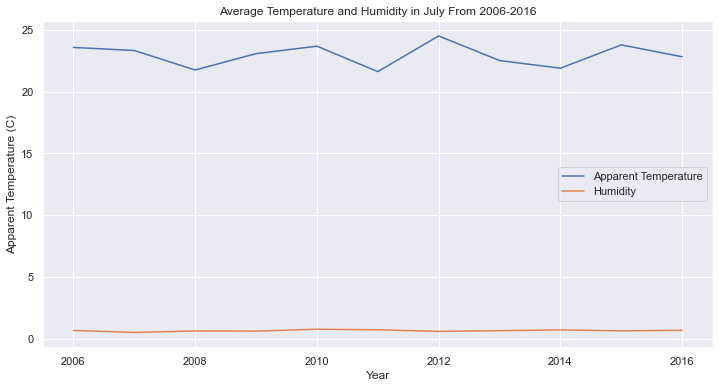

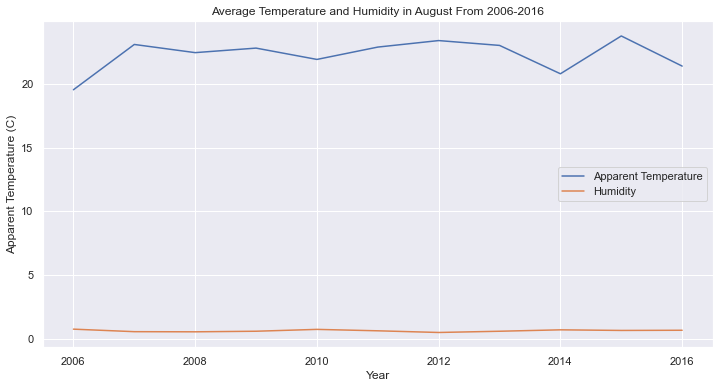

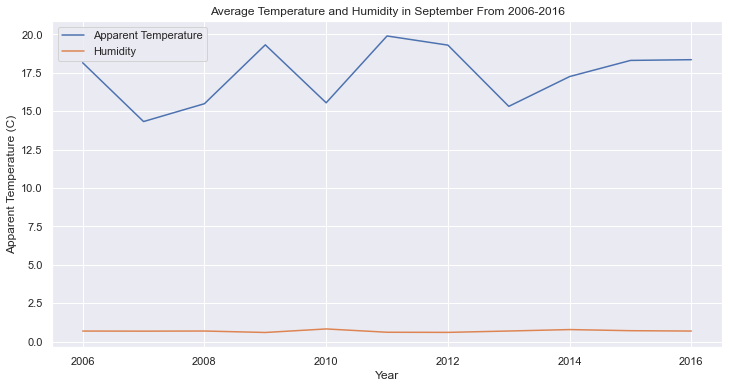

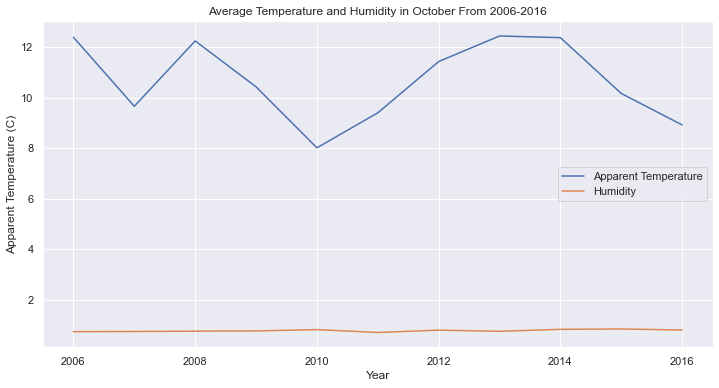

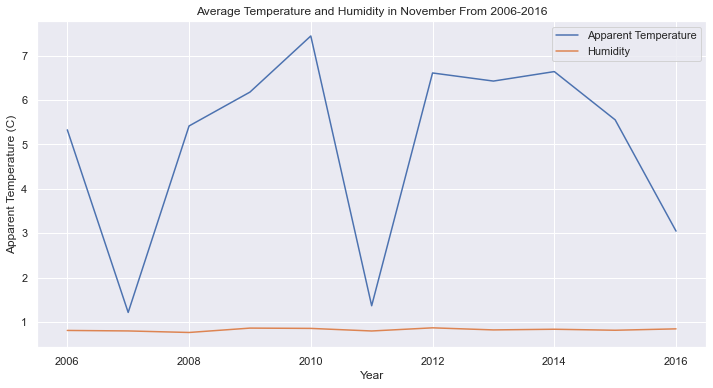

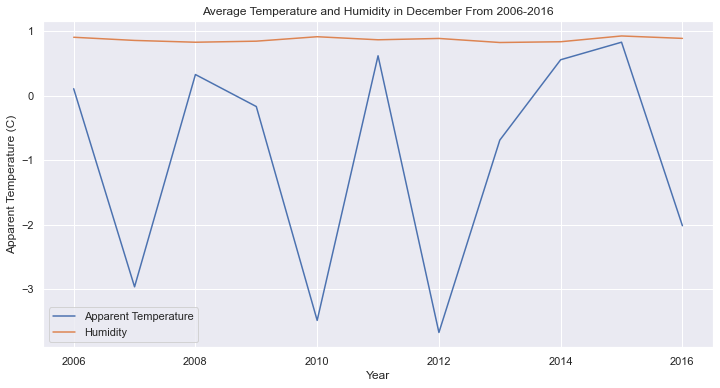

In [41]:
plot_temp_humidity()

In [42]:
#Forcasting Apparent Temperature using Fbprophet

model = Prophet()

In [43]:
data = monthly_data.drop(['Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)'], axis = 1)
data.rename(columns = {'Formatted Date':'ds', 'Apparent Temperature (C)':'y'}, inplace = True)
data['ds'] = data['ds'].dt.tz_localize(None)

In [44]:
data.head()

,ds,y
0,2006-01-31,-4.173708
1,2006-02-28,-2.990716
2,2006-03-31,1.969780
3,2006-04-30,12.098827
4,2006-05-31,15.539479


In [45]:
model.fit(data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [46]:
#Predicting temperatue till 2017
future = model.make_future_dataframe(periods=12,freq='m')

In [47]:
future.tail()

,ds
139,2017-08-31
140,2017-09-30
141,2017-10-31
142,2017-11-30
143,2017-12-31


In [48]:
pred = model.predict(future)

In [49]:
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-01-31,10.559973,-4.575065,-0.204705,10.559973,10.559973,-12.865180,-12.865180,-12.865180,-12.865180,-12.865180,-12.865180,0.0,0.0,0.0,-2.305207
1,2006-02-28,10.570224,-3.113406,1.310276,10.570224,10.570224,-11.452890,-11.452890,-11.452890,-11.452890,-11.452890,-11.452890,0.0,0.0,0.0,-0.882666
2,2006-03-31,10.581573,2.657917,6.893609,10.581573,10.581573,-5.843626,-5.843626,-5.843626,-5.843626,-5.843626,-5.843626,0.0,0.0,0.0,4.737948
3,2006-04-30,10.592557,9.831831,13.981175,10.592557,10.592557,1.200265,1.200265,1.200265,1.200265,1.200265,1.200265,0.0,0.0,0.0,11.792822
4,2006-05-31,10.603906,14.106108,18.561884,10.603906,10.603906,5.781833,5.781833,5.781833,5.781833,5.781833,5.781833,0.0,0.0,0.0,16.385739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2017-08-31,11.287511,20.482187,24.731706,11.285786,11.289367,11.290584,11.290584,11.290584,11.290584,11.290584,11.290584,0.0,0.0,0.0,22.578095
140,2017-09-30,11.292317,15.438605,20.115169,11.290193,11.294631,6.419044,6.419044,6.419044,6.419044,6.419044,6.419044,0.0,0.0,0.0,17.711361
141,2017-10-31,11.297284,8.956628,13.118418,11.294698,11.300090,-0.239698,-0.239698,-0.239698,-0.239698,-0.239698,-0.239698,0.0,0.0,0.0,11.057587
142,2017-11-30,11.302091,3.275282,7.652829,11.299073,11.305355,-5.855436,-5.855436,-5.855436,-5.855436,-5.855436,-5.855436,0.0,0.0,0.0,5.446655


In [50]:
pred[['ds','yhat','yhat_lower','yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
132,2017-01-31,-1.670960,-3.901423,0.558161
133,2017-02-28,-0.178549,-2.476332,2.137176
134,2017-03-31,5.480133,3.407945,7.813304
135,2017-04-30,12.580878,10.433280,14.840377
136,2017-05-31,17.135881,15.006090,19.205513
137,2017-06-30,21.127860,19.080139,23.357986
138,2017-07-31,23.302341,21.057510,25.483611
139,2017-08-31,22.578095,20.482187,24.731706
140,2017-09-30,17.711361,15.438605,20.115169
141,2017-10-31,11.057587,8.956628,13.118418


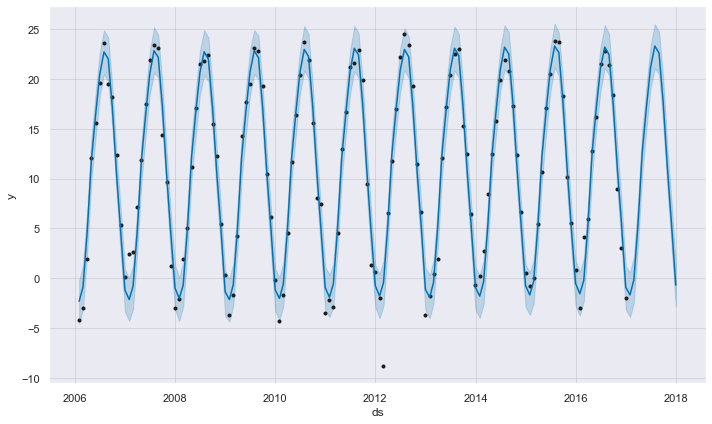

In [51]:
model.plot(pred);

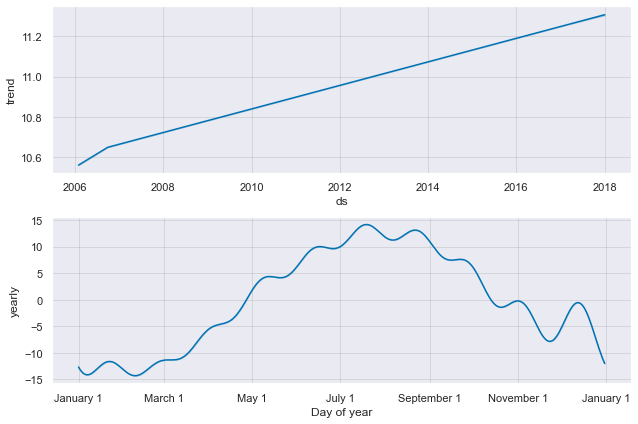

In [52]:
model.plot_components(pred);